In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [27]:
file = h5py.File('./output_a_0.5_B_0.04_Gag//snap_1215.hdf5', 'r')

In [28]:
#file = h5py.File('/mnt/Linux_Shared_Folder_2022/output_8k_Gadget//snap_1450.hdf5', 'r')

In [29]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [30]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [31]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [32]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (16384, 3), type "<f4">

In [33]:
v = file['PartType0']['Velocities']

vv = (v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2)**0.5
print(np.sort(vv))

[0.02220383 0.03354137 0.04220441 ... 2.5046635  2.5138073  2.6833658 ]


In [34]:
h = file['PartType0']['SmoothingLength']

np.min(h), np.max(h), np.median(h)

(0.012667814, 1.074558, 0.09847063)

In [35]:
mass = file['PartType0']['Masses']

np.min(mass), np.max(mass), np.median(mass)

(5.493164e-05, 6.713867e-05, 6.1000475e-05)

In [36]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!

G = 6.6738e-8
rgas = 7.07e16                                     # The initial radius of the cloud in cm
rho0 = 1.35e-18                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

UnitDensity_in_cgs = UnitMass_in_g / unitLength_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 5.630894306601103e-18 g/cm^3
unitVelocity_in_cm_per_s = 39103.2 cm/s


In [37]:
rho = list(file['PartType0']['Density'])

np.sort(rho)* UnitDensity_in_cgs

array([3.3586560e-21, 4.6056063e-21, 4.8519923e-21, ..., 1.9191336e-15,
       1.9339804e-15, 2.0130712e-15], dtype=float32)

In [38]:
x = coord[:, 0]
y = coord[:, 1]
z = coord[:, 2]

(-1.0, 1.0)

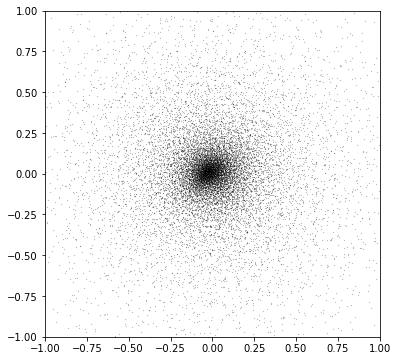

In [39]:
plt.figure(figsize = (6, 6))
plt.scatter(x, y, s = 0.01, color = 'k')
xy = 1.0
plt.xlim(-xy, xy)
plt.ylim(-xy, xy)

In [28]:
delta = 0.02

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

rx = x[nz]
ry = y[nz]
rz = z[nz]

vt = v[nz]

2431


(-1.0, 1.0)

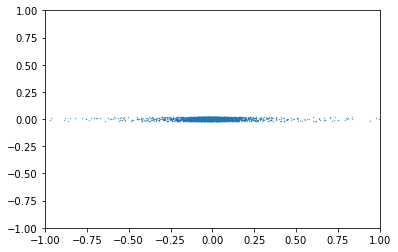

In [29]:
plt.scatter(rx, rz, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [30]:
radius = (rx*rx + ry*ry + rz*rz)**0.5

vr = (vt[:, 0]*rx + vt[:, 1]*ry + vt[:, 2]*rz)/radius

In [31]:
print(np.sort(vr))

[-2.308084  -2.221272  -2.0549083 ...  1.2732872  1.3791324  1.4238136]


In [32]:
logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(vr[nx])])

res = np.array(res)

In [33]:
R = res[:, 0] * unitLength_in_cm
vr = res[:, 1] * unitVelocity_in_cm_per_s

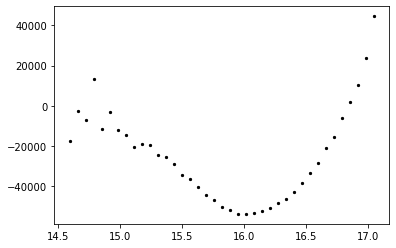

In [34]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');

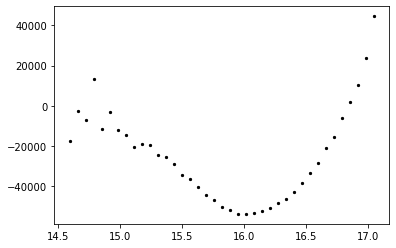

In [35]:
plt.scatter(np.log10(R), vr, s = 5, color = 'k');